In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from scipy.optimize import curve_fit
from sklearn.cluster import KMeans

In [15]:
# dataset
urban_df = pd.read_csv('urban population.csv')

'''choose for clustering because its very long dataset but we only choose two years for clustering
    we also remove all of the nul values to make error free clusters'''
Df_urban = urban_df[["2019","2020"]].dropna()
# make arrary
X = Df_urban.values


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,NaN
1,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.704688,14.944459,15.185608,15.444414,15.719076,16.001992,...,33.071687,33.507548,33.952424,34.405084,34.865101,35.332373,35.807770,36.291322,36.783306,NaN
2,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,8.401000,8.684000,8.976000,9.276000,9.586000,9.904000,...,24.160000,24.373000,24.587000,24.803000,25.020000,25.250000,25.495000,25.754000,26.026000,NaN
3,Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.670329,15.053577,15.449282,15.864021,16.294984,16.741361,...,42.901035,43.530704,44.157131,44.781373,45.401809,46.019334,46.633138,47.242853,47.848625,NaN
4,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,10.435000,10.798000,11.204000,11.624000,12.058000,12.504000,...,61.268000,62.002000,62.731000,63.446000,64.149000,64.839000,65.514000,66.177000,66.825000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Samoa,WSM,Urban population (% of total population),SP.URB.TOTL.IN.ZS,18.926000,18.986000,19.061000,19.141000,19.221000,19.301000,...,19.624000,19.385000,19.149000,18.914000,18.681000,18.452000,18.243000,18.056000,17.889000,NaN
259,"Yemen, Rep.",YEM,Urban population (% of total population),SP.URB.TOTL.IN.ZS,9.100000,9.459000,9.831000,10.216000,10.614000,11.026000,...,32.958000,33.559000,34.165000,34.777000,35.394000,36.016000,36.642000,37.273000,37.908000,NaN
260,South Africa,ZAF,Urban population (% of total population),SP.URB.TOTL.IN.ZS,46.619000,46.793000,46.906000,47.020000,47.134000,47.248000,...,63.272000,63.793000,64.312000,64.828000,65.341000,65.850000,66.355000,66.856000,67.354000,NaN
261,Zambia,ZMB,Urban population (% of total population),SP.URB.TOTL.IN.ZS,18.145000,18.951000,19.785000,20.712000,22.015000,23.372000,...,40.354000,40.865000,41.382000,41.907000,42.438000,42.976000,43.521000,44.072000,44.629000,NaN


In [3]:
'''desribe the choosen dataset'''
Df_urban.describe()

,2019,2020
count,262.000000,262.000000
mean,60.231410,60.558663
std,22.725521,22.663185
min,13.250000,13.345000
25%,42.201414,42.493195
50%,60.172500,61.063159
75%,79.904000,80.314584
max,100.000000,100.000000


In [4]:

'''Min max scaler is used for normaliazation for this we use simple library of python sklearn preprocessing'''

scaler = preprocessing.MinMaxScaler()
names = Df_urban.columns
de= scaler.fit_transform(Df_urban)
scaled_df = pd.DataFrame(de,columns=names)

E:\Files\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


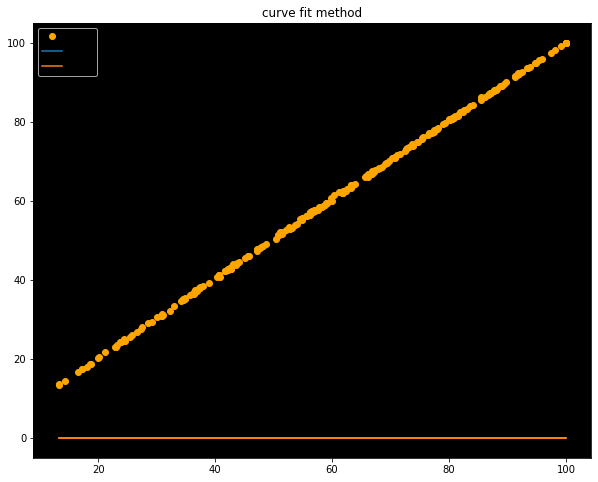

In [9]:

'''fitting the dataset using curve fit '''
from scipy.optimize import curve_fit

'''split in x and y'''

x = Df_urban["2019"]
y = Df_urban["2020"]

def temp(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y
    
'''that above function is guassian function that is for fit the model using curve_fit'''
param, cov = curve_fit(temp,x, y)
fitA = param[0]
fitB = param[1]
fit_y = temp(X, fitA, fitB)

#     plotting
plt.figure(figsize=(10,8))

plt.rcParams['axes.facecolor'] = 'black'
plt.plot(x, y,'o', label='data', color="orange")
plt.title("curve fit method")
plt.plot(x, fit_y, '-', label='fit')
plt.legend()
plt.show()

In [11]:
# future values prediction
'''finding possible num of cluster in given dataset using elbow graph'''
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

E:\Files\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


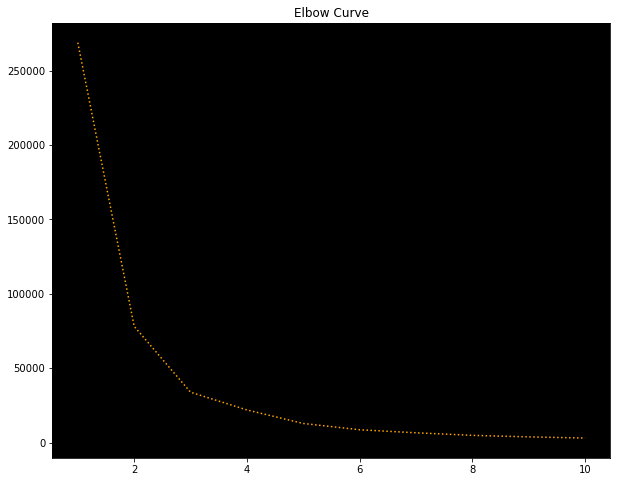

In [12]:

plt.figure(figsize=(10,8))
plt.rcParams['axes.facecolor'] = 'black'
plt.title("Elbow Curve")
plt.plot(range(1,11),wcss, linestyle ="dotted", color="orange")
plt.show()

In [13]:

'''5 clusters easily make from this dataset as we determine in elbow graph'''
# use buitlin function for kmean cluster of sklearn.cluster
kmeans = KMeans(n_clusters = 5, init = "k-means++")
y_kmeans = kmeans.fit_predict(X)
y_kmeans



array([1, 1, 4, 1, 0, 0, 3, 0, 3, 3, 0, 3, 4, 3, 0, 0, 4, 3, 1, 4, 1, 2,
       3, 2, 1, 2, 1, 3, 2, 3, 4, 2, 1, 2, 1, 2, 0, 2, 4, 3, 0, 0, 0, 1,
       0, 2, 4, 0, 2, 0, 2, 3, 3, 0, 2, 2, 2, 2, 3, 2, 2, 0, 1, 0, 0, 2,
       0, 1, 2, 2, 2, 4, 2, 1, 3, 0, 2, 1, 4, 3, 2, 0, 0, 3, 1, 0, 1, 2,
       2, 1, 3, 0, 3, 4, 2, 3, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       2, 2, 3, 3, 2, 0, 3, 3, 0, 4, 1, 4, 0, 4, 2, 3, 2, 1, 3, 0, 2, 4,
       2, 1, 1, 4, 4, 1, 0, 4, 0, 2, 3, 2, 3, 0, 3, 1, 1, 1, 0, 2, 2, 0,
       0, 1, 3, 4, 0, 0, 2, 3, 1, 0, 1, 4, 2, 2, 0, 2, 4, 0, 0, 3, 2, 4,
       3, 3, 2, 3, 0, 1, 2, 2, 1, 2, 4, 0, 1, 3, 0, 0, 0, 2, 1, 2, 0, 3,
       0, 2, 4, 1, 2, 1, 1, 3, 4, 1, 2, 3, 1, 0, 1, 4, 1, 0, 2, 0, 0, 0,
       3, 4, 3, 0, 0, 3, 4, 0, 0, 1, 0, 4, 0, 2, 4, 0, 4, 1, 1, 0, 2, 2,
       0, 1, 4, 2, 0, 3, 2, 0, 0, 3, 1, 3, 1, 4, 0, 4, 1, 0, 1, 1])

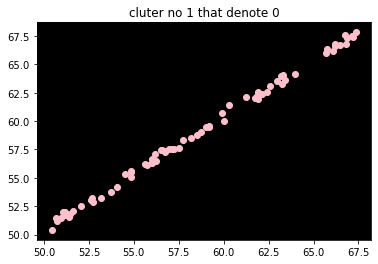

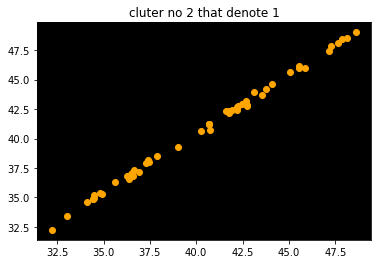

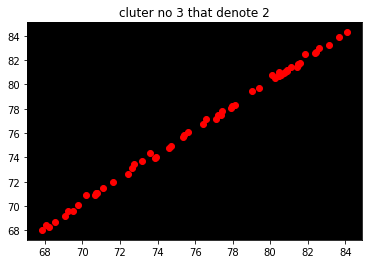

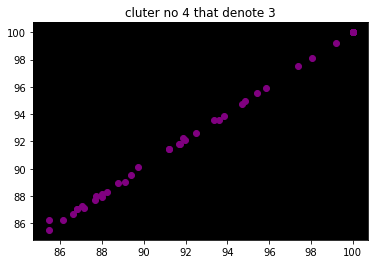

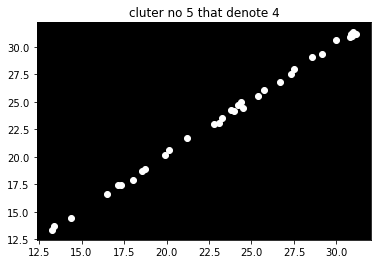

In [14]:
# Interpretation of the results.
'''according to prediction of k mean most of values are 0 then 2 then 3 and 1 is at last 
first cluster is of 0
second cluster is of 2
third cluster is of 3
fourth cluster is of 1'''

c = ["pink","orange", "red","purple","white"]
for i in range(5):
#     plt.figure(figsize=(10,8))
    string = f"cluter no {i+1} that denote {i}"
    plt.title(string)
    plt.scatter(X[y_kmeans==i,0], X[y_kmeans==i,1], color=c[i])
    plt.show()

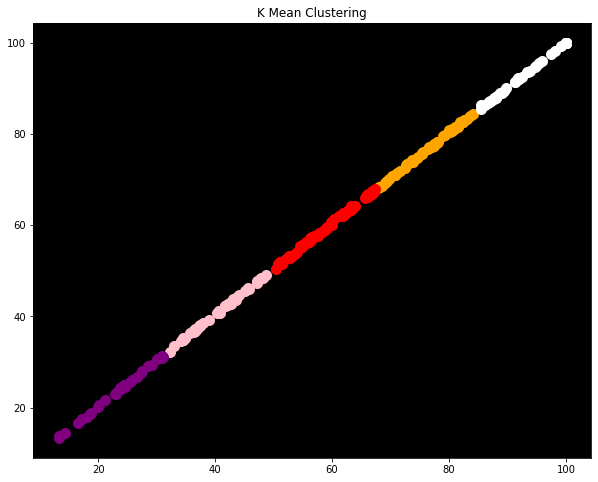

In [27]:
'''now we plotting all in single frame to make different clusters finally'''


plt.figure(figsize = (10,8))
plt.title("K Mean Clustering")
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],s=100, c="pink")
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],s=100, c="orange")
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],s=100, c="red")
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1],s=100, c="purple")
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1],s=100, c="white")



